In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
x, y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

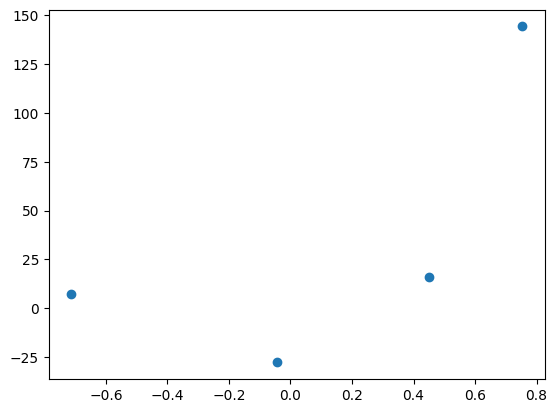

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [7]:
from matplotlib.cbook import normalize_kwargs
# applying OLS (the standard formulas)
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)
LinearRegression(copy_X = True, fit_intercept=True, n_jobs = None)

reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

np.float64(26.15963284313262)

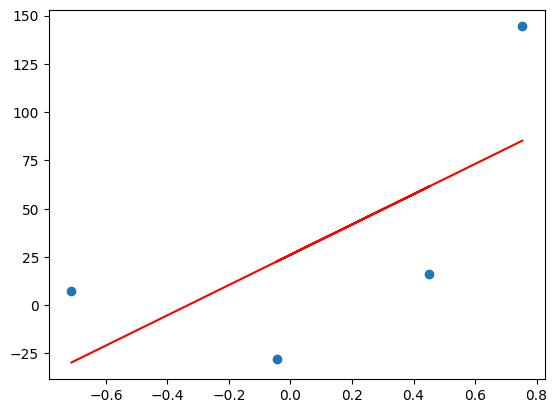

In [9]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

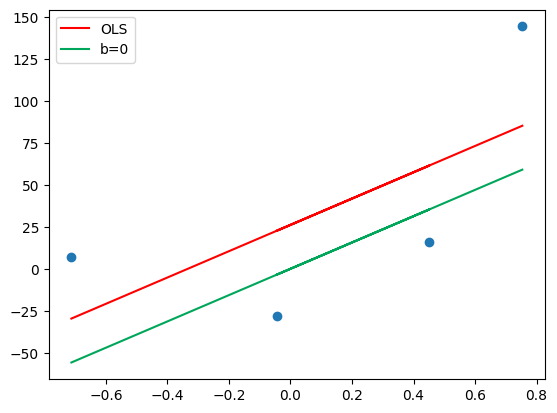

In [10]:
# apply gradient descent assuming slope is constant m = 78.35
# and assume the starting value for the intercept is b = 0
y_pred = ((78.35*x)+0).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='#00a65a',label='b=0')

plt.legend()
plt.show()

In [11]:
m = 78.35
b = 0
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

np.float64(-209.27763408209216)

In [12]:
# lets take learning rate = 0.1

lr= 0.1
step_size= loss_slope * lr
step_size

np.float64(-20.927763408209216)

In [13]:
# calculating the new intercept
b = b- step_size
b

np.float64(20.927763408209216)

In [14]:
y_pred1 = ((78.35 * x)+b).reshape(4)

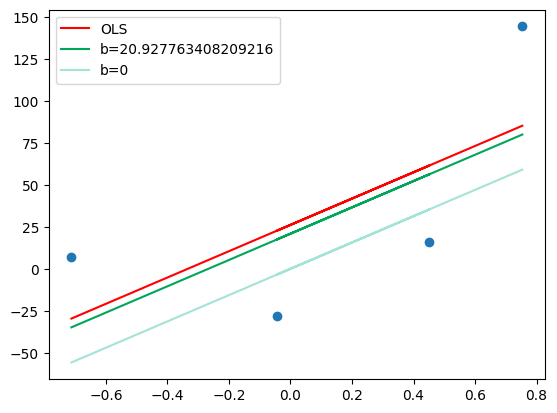

In [16]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label = 'OLS')
plt.plot(x,y_pred1,color="#00a65a",label = 'b={}'.format(b))
plt.plot(x,y_pred,color="#A3E4D7",label='b=0')

plt.legend()
plt.show()

In [17]:
# iteration 2
loss_slope = -2 * np.sum(y-m*x.ravel()-b)
loss_slope

np.float64(-41.85552681641843)

In [21]:
step_size= loss_slope * lr
step_size

np.float64(-4.185552681641844)

In [20]:
b = b - step_size
b

np.float64(29.298868771492906)

In [22]:
y_pred2 = ((78.35 * x) + b).reshape(4)

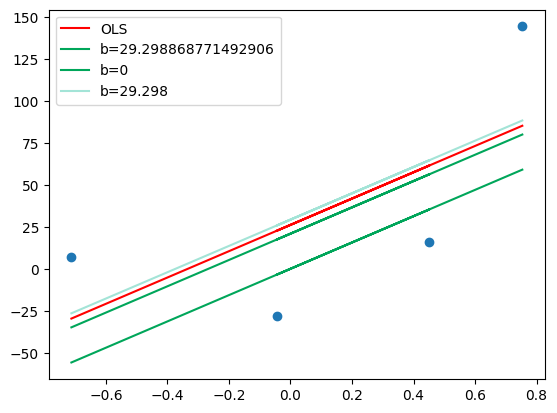

In [24]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label = 'OLS')
plt.plot(x,y_pred1,color="#00a65a",label = 'b={}'.format(b))
plt.plot(x,y_pred,color="#00a65a",label='b=0')
plt.plot(x,y_pred2,color= "#A3E4D7",label="b=29.298")
plt.legend()
plt.show()

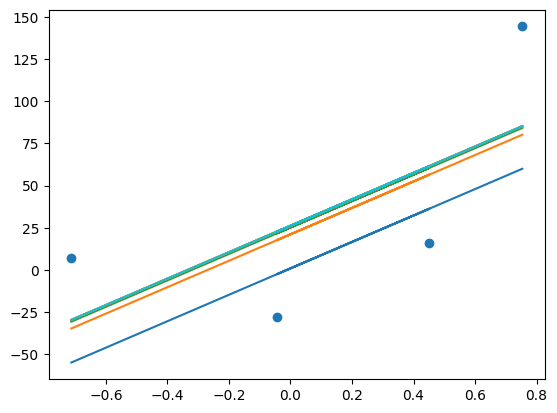

In [28]:
# gotta sum up everything in a loop, and play with the values
b = -100
m = 78.35
lr = 0.1

epochs=10

for i in range(epochs):
  loss_slope = -2 * np.sum(y-m*x.ravel()-b)
  b = b - (lr*loss_slope)

  y_pred = m * x + b

  plt.plot(x,y_pred)

plt.scatter(x,y)